In [82]:
import pandas as pd

In [105]:
# from FanGraphs, get DWAR usingTY data
def read_dwar(year):
    df = pd.read_csv(f'DWAR {year - 1}-{year}.csv', index_col=False).sort_values('Inn', ascending=False).drop_duplicates(subset='playerid', keep='last')

    df = df[df['Def'].notna()].sort_values("Def")
    df['DWAR/Inn'] = df['Def'] / df['Inn']
        
    # join with player ids
    player_map = pd.read_csv('../PLAYERIDMAP 2022.csv')[['IDFANGRAPHS', 'PLAYERNAME', 'MLBID']]#.set_index('IDFANGRAPHS')
        
    df['playerid'] = df['playerid'].astype(str)
    
    merge = df[['playerid','DWAR/Inn']].merge(player_map, how='left', left_on='playerid', right_on='IDFANGRAPHS').set_index('MLBID')[['PLAYERNAME', 'DWAR/Inn']]
        
    mean = merge['DWAR/Inn'].mean()
    std = merge['DWAR/Inn'].std()
    
    merge['Z'] = (merge['DWAR/Inn'] - mean) / std
    
    return merge[['PLAYERNAME', 'Z']].reset_index().groupby(['MLBID', 'PLAYERNAME']).max().reset_index().set_index('MLBID')

dw_data = read_dwar(2022)
dw_data.head()

,PLAYERNAME,Z
MLBID,,
405395.0,Albert Pujols,-0.235549
425877.0,Yadier Molina,0.936904
429664.0,Robinson Cano,-0.731059
435559.0,Kurt Suzuki,-0.337148
444482.0,David Peralta,0.023368


0.9993971821109228
-7.605579016871268
3.3877899863488827


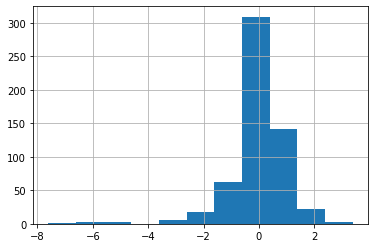

In [96]:
print((dw_data['Z'].max() - dw_data['Z'].min()) / 11)
print(dw_data['Z'].min())
print(dw_data['Z'].max())
hist = dw_data['Z'].hist(bins=11)

In [97]:
# floor and increment based on players with min. 150 innings
def get_fielding(dw):
    i = 0
    while i < 10:
        floor = -3.13 + (i * 0.6)
        if dw > floor:
            i += 1
        else:
            break
    return 4 + i

In [98]:
def assign_fld(year):
    fld_data = read_dwar(2022)
    fld_data['Fielding'] = fld_data.apply(lambda x: get_fielding(x['Z']), axis=1)
    return fld_data[['PLAYERNAME', 'Fielding']].dropna()

fld_df = assign_fld(2022)
fld_df.head()

,PLAYERNAME,Fielding
MLBID,,
405395.0,Albert Pujols,9
425877.0,Yadier Molina,11
429664.0,Robinson Cano,8
435559.0,Kurt Suzuki,9
444482.0,David Peralta,10


In [99]:
fld_df.to_csv('2022_Fielding.csv')

In [103]:
fld_df[fld_df['Fielding'] == 4]

,PLAYERNAME,Fielding
MLBID,,
542340.0,Jonathan Villar,4
543510.0,James McCann,4
600301.0,Taylor Motter,4
621458.0,Edwin Rios,4
650333.0,Luis Arraez,4
660829.0,Hoy Park,4
